## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [79]:
## Loading data
df = pd.read_csv('/content/airbnb_hw.csv')
df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

df = df.loc[:,['price','beds','n_reviews','score']]
df.head()


,price,beds,n_reviews,score
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0


In [80]:
## Cleaning price
price = df['price']
price.unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [89]:
price = price.str.replace(',', '')
price = pd.to_numeric(price, errors='coerce')
price.unique()

AttributeError: Can only use .str accessor with string values!

In [82]:
## Cleaning beds
beds = df['beds']
beds.unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [83]:
beds = beds.replace(0., np.nan)
beds.unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12., 16.,  9.,
       11.])

In [84]:
## Cleaning number of reviews
n_reviews = df['n_reviews']
n_reviews.unique()

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [85]:
## Cleaning review scores rating
score = df['score']
score.unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [86]:
## dropping NAs
df = df.dropna()
df.describe()

,beds,n_reviews,score
count,22111.000000,22111.000000,22111.000000
mean,1.558093,16.523179,91.991633
std,1.044014,24.322185,8.851965
min,0.000000,1.000000,20.000000
25%,1.000000,3.000000,89.000000
50%,1.000000,7.000000,94.000000
75%,2.000000,20.000000,100.000000
max,16.000000,257.000000,100.000000


In [87]:
## Maxmin normalizing
def maxmin(x):
    z = (x-min(x))/(max(x)-min(x))
    return z

norm_df = df.drop('price',axis=1)
norm_df = norm_df.apply(maxmin)
norm_df.describe()

,beds,n_reviews,score
count,22111.000000,22111.000000,22111.000000
mean,0.097381,0.060637,0.899895
std,0.065251,0.095009,0.110650
min,0.000000,0.000000,0.000000
25%,0.062500,0.007812,0.862500
50%,0.062500,0.023438,0.925000
75%,0.125000,0.074219,1.000000
max,1.000000,1.000000,1.000000


3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(norm_df) # Fit the emodel
norm_df['cluster'] = model.labels_

norm_df.describe()

,beds,n_reviews,score,cluster
count,22111.000000,22111.000000,22111.000000,22111.000000
mean,0.097381,0.060637,0.899895,1.881326
std,0.065251,0.095009,0.110650,1.461129
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.007812,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

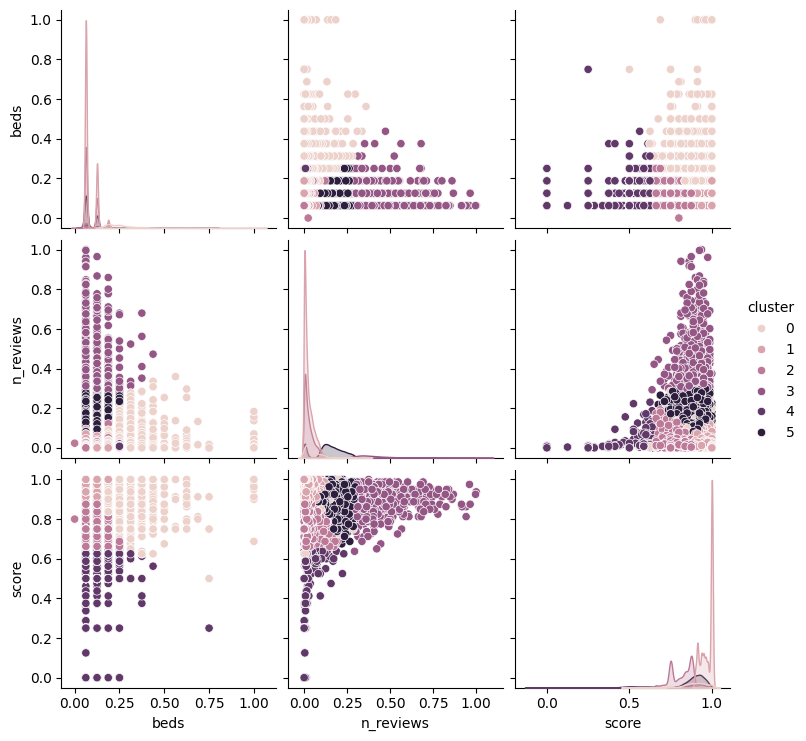

In [75]:
sns.pairplot(data=norm_df,hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?


In [76]:
df['cluster'] = model.labels_
df.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                 
         count unique  top freq
cluster                        
0         1627    294  150   67
1        10491    361  150  530
2         5547    287  150  249
3          793    156   99   36
4          631    146  100   28
5         3022    258  150  126

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```



2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.


4. Explain the intuition of the elbow, using this numerical simulation as an example.